# Get the data

Get the data processed in the previous notebook (Exploratory Data Analysis)

In [1]:
import pandas as pd

In [2]:
from src.constants import X_TRAIN_PATH, X_TEST_PATH, Y_TRAIN_PATH, Y_TEST_PATH

# save the processed data to their corresponding files
X_train = pd.read_csv(filepath_or_buffer=X_TRAIN_PATH, sep=',')
X_test = pd.read_csv(filepath_or_buffer=X_TEST_PATH, sep=',')

y_train = pd.read_csv(filepath_or_buffer=Y_TRAIN_PATH, sep=',')
y_train = y_train['class'].to_numpy()

y_test = pd.read_csv(filepath_or_buffer=Y_TEST_PATH, sep=',')
y_test = y_test['class'].to_numpy()

In [3]:
# verify x_train
X_train.head()

,Latitude,Longitude,MedInc
0,32.71,-117.03,3.2596
1,33.77,-118.16,3.8125
2,34.66,-120.48,4.1563
3,32.69,-117.11,1.9425
4,36.78,-119.80,3.5542


In [4]:
# verify x_test
X_test.head()

,Latitude,Longitude,MedInc
0,36.06,-119.01,1.6812
1,35.14,-119.46,2.5313
2,37.80,-122.44,3.4801
3,34.28,-118.72,5.7376
4,36.62,-121.93,3.7250


In [5]:
# verify y_train
y_train

array([3, 3, 4, ..., 3, 2, 1], shape=(16512,))

In [6]:
# verify y_test
y_test

array([4, 4, 1, ..., 2, 4, 3], shape=(4128,))

# Option 1. Default model

## Step 1: Initialization and training of the model

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [8]:
print(f"Hyperparameters of the default model: {model.get_params()}")

Hyperparameters of the default model: {'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


## Step 2: Model prediction

In [9]:
# make the prediction
y_pred = model.predict(X_test)
y_pred

array([4, 4, 1, ..., 2, 4, 3], shape=(4128,))

In [10]:
# make the prediction of the probabilities of being one class or another
y_prob = model.predict_proba(X_test)

## Step 3: Metrics

Let's print the full report of the model

In [11]:
labels: list[int] = [0, 1, 2, 3, 4, 5]

In [12]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)


default_model_accuracy = accuracy_score(y_test, y_pred)
default_model_precision = precision_score(y_test, y_pred, average="weighted", labels=labels)
default_model_recall = recall_score(y_test, y_pred, average="weighted", labels=labels)
default_model_f1 = f1_score(y_test, y_pred, average="weighted", labels=labels)
default_model_auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovo', labels=labels)
default_model_confusion = confusion_matrix(y_test, y_pred, labels=labels)
default_model_report = classification_report(y_test, y_pred, labels=labels)

print(f'Accuracy: {default_model_accuracy}')
print(f'Precision: {default_model_precision}')
print(f'Recall: {default_model_recall}')
print(f'F1-Score: {default_model_f1}')
print(f'AUC-ROC: {default_model_auc_roc}')

Accuracy: 0.9937015503875969
Precision: 0.9936730195105674
Recall: 0.9937015503875969
F1-Score: 0.9936627957511646
AUC-ROC: 0.9999000449501595


In [13]:
print(f'Classification Report:\n\n{default_model_report}')

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       0.99      1.00      1.00       960
           2       1.00      0.99      0.99       519
           3       1.00      1.00      1.00      1388
           4       0.99      0.99      0.99       338
           5       0.97      0.92      0.94       106

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.99      4128
weighted avg       0.99      0.99      0.99      4128



Now let's draw the confusion matrix

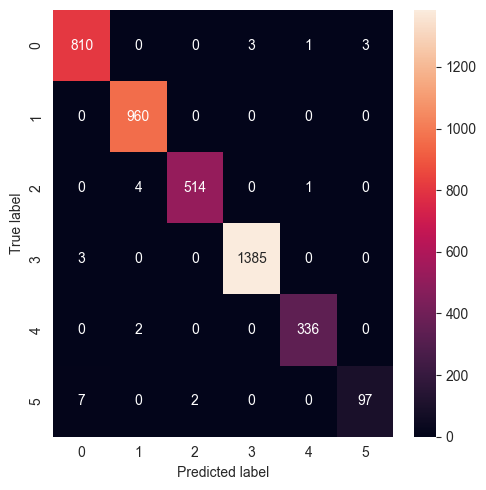

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(5, 5))

sns.heatmap(default_model_confusion, annot=True, fmt='')

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()


This confusion matrix reads as follows: The value on Y axis is the true label and the value in the X axis is the predicted label. We can see a very good performance from the model.

# Option 2. Model with optimization

In [25]:
# create another model
opt_model = XGBClassifier(random_state=42)

## Step 1: Create the hyperparameter optimization model

In [26]:
from sklearn.model_selection import GridSearchCV

# define the parameters that we want to adjust by hand, depends on the model to use
param_grid  = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# initialize the grid
grid = GridSearchCV(opt_model, param_grid , scoring = 'accuracy', cv = 5, n_jobs=4, verbose=0)

## Step 2: Fit the model

In [27]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.7}


## Step 3: Get the best model and predict

In [28]:
# get the best parameters and model
best_params = grid.best_params_
best_model: XGBClassifier = grid.best_estimator_

In [29]:
# predict the values
y_pred = best_model.predict(X_test)

In [30]:
# make the prediction of the probabilities of being one class or another
y_prob = best_model.predict_proba(X_test)

## Step 4: Metrics of the model

In [31]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)


optimized_model_accuracy = accuracy_score(y_test, y_pred)
optimized_model_precision = precision_score(y_test, y_pred, average="weighted", labels=labels)
optimized_model_recall = recall_score(y_test, y_pred, average="weighted", labels=labels)
optimized_model_f1 = f1_score(y_test, y_pred, average="weighted", labels=labels)
optimized_model_auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovo', labels=labels)
optimized_model_confusion = confusion_matrix(y_test, y_pred, labels=labels)
optimized_model_report = classification_report(y_test, y_pred, labels=labels)

print(f'Accuracy: {optimized_model_accuracy}')
print(f'Precision: {optimized_model_precision}')
print(f'Recall: {default_model_recall}')
print(f'F1-Score: {default_model_f1}')
print(f'AUC-ROC: {default_model_auc_roc}')

Accuracy: 0.9946705426356589
Precision: 0.994663713125669
Recall: 0.9937015503875969
F1-Score: 0.9936627957511646
AUC-ROC: 0.9999000449501595


In [32]:
print(f'Classification Report:\n\n{default_model_report}')

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       0.99      1.00      1.00       960
           2       1.00      0.99      0.99       519
           3       1.00      1.00      1.00      1388
           4       0.99      0.99      0.99       338
           5       0.97      0.92      0.94       106

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.99      4128
weighted avg       0.99      0.99      0.99      4128



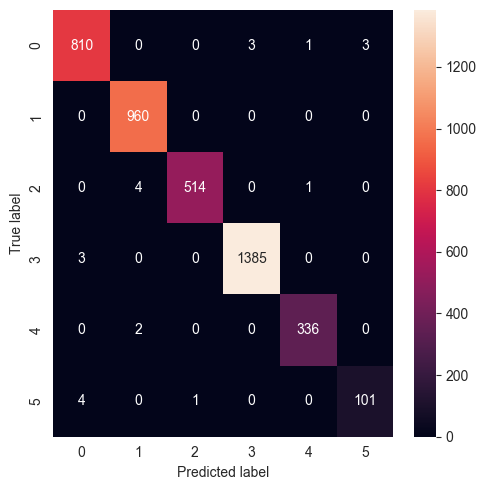

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(5, 5))

sns.heatmap(optimized_model_confusion, annot=True, fmt='')

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

This confusion matrix reads as follows: The value on Y axis is the true label and the value in the X axis is the predicted label. We can see this model has an even better performance than the default model.

# Conclusion

In [38]:

from src.markdown_utils import show_comparison_table

# set the metrics to use
metrics: list[str] = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# get the metrics of the default and optimized list values
default_model_metrics: list[float] = [default_model_accuracy, default_model_precision, default_model_recall, default_model_f1, default_model_auc_roc]
optimized_model_metrics: list[float] = [optimized_model_accuracy, optimized_model_precision, optimized_model_recall, optimized_model_f1, optimized_model_auc_roc]

# construct the Markdown table
show_comparison_table(
    metric_names=metrics,
    first_metrics=default_model_metrics,
    second_metrics=optimized_model_metrics,
)

| Metric | Model Metrics 1 | Model Metrics 2 |
|---|---|---|
| Accuracy | 0.994 | 0.995 |
| Precision | 0.994 | 0.995 |
| Recall | 0.994 | 0.995 |
| F1-Score | 0.994 | 0.995 |
| AUC-ROC | 1.0 | 1.0 |


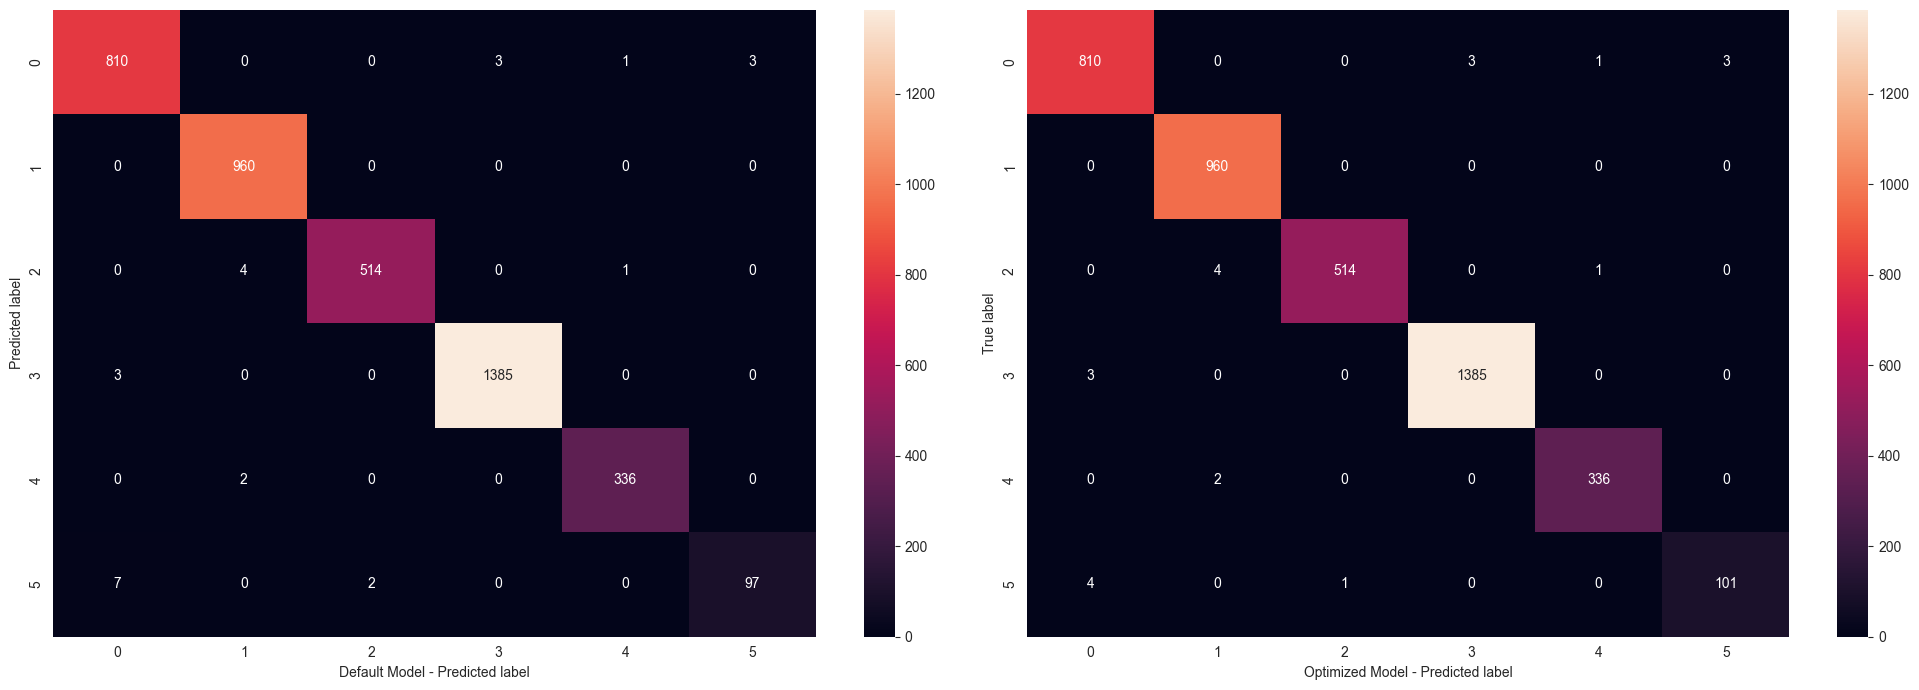

In [39]:
_, axis = plt.subplots(1, 2, figsize=(20, 7))

# first heatmap
sns.heatmap(ax=axis[0], data=default_model_confusion, annot=True, fmt='').set(
    xlabel=f'Default Model - Predicted label', ylabel='Predicted label'
)

# second heatmap
sns.heatmap(ax=axis[1], data=optimized_model_confusion, annot=True, fmt='').set(
    xlabel=f'Optimized Model - Predicted label', ylabel='True label'
)

plt.tight_layout()
plt.show()

#### Final Conclusion

We can see that the optimized model has a better performance with the label with less support, so the optimized one is the response to the declared problem.

# Save the model

Save the optimized model for future use.

In [40]:
from pickle import dump

with open("../models/optimized_xgboost.sav", "wb") as file:
    dump(best_model, file)